<a href="https://colab.research.google.com/github/jordanleefinance/MFinA/blob/main/final_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install pmdarima
!pip install matplotlib
!pip install numpy

     |████████████████████████████████| 1.4 MB 6.7 MB/s 
     |████████████████████████████████| 9.8 MB 42.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import yfinance as yf
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
path = r"C:\Users\jorda\OneDrive\Documents\MFinA\FINC 595 - SPC TP FInancial Time Series\NIKE Inc NYSE NKE Financials.xls"
mydir = r'C:\Users\jorda\OneDrive\Documents\MFinA\FINC 595 - SPC TP FInancial Time Series'
myfile = '\NIKE Inc NYSE NKE Financials.xls'
goodpath = os.path.join(mydir, myfile)

In [ ]:
df = yf.download(tickers=["NKE", "^GSPC"], start='2006-07-01', end='2022-03-31', parse_dates=True)['Close']

start_date = '2006-09-30'
end_date = '2022-03-31'
dates = (pd.date_range(pd.to_datetime(start_date),
                       pd.to_datetime(end_date) + pd.offsets.QuarterBegin(1), freq='Q').tolist())


income_statement = pd.read_excel(r"C:\Users\jorda\OneDrive\Documents\MFinA\FINC 595 - SPC TP FInancial Time Series\NIKE Inc NYSE NKE Financials.xls",
                                 sheet_name="Income Statement", index_col=[0], header=[4])
income_statement.columns = dates
dep_drop = income_statement.T
dep_drop = dep_drop.drop(columns=['Depreciation & Amort.'])
income_statement = dep_drop.T

cash_flow = pd.read_excel(path, sheet_name="Cash Flow", index_col=[0], header=[4])
cash_flow.columns = dates
frame = pd.concat([income_statement, cash_flow])
frame = frame.T
frame['corporate_tax_rate'] = np.where(frame['Income Tax Expense'] > 1, frame['Income Tax Expense'] / frame['EBIT'], -1)

for index, row in frame.iterrows():
    if row['corporate_tax_rate'] > 0.35 or row['corporate_tax_rate'] < 0.15:
        frame.drop(index, inplace=True)

[*********************100%***********************]  2 of 2 completed


FileNotFoundError: ignored

In [ ]:
# print(frame)
corporate_tax_rate = frame['corporate_tax_rate'].mean()
print(corporate_tax_rate)

0.23738243174637558


In [ ]:
frame['Depreciation & Amort.']

2006-12-31     61.1
2007-03-31     44.4
2007-06-30     87.9
2007-09-30     68.9
2007-12-31     83.5
2008-03-31     89.7
2008-06-30     70.2
2008-09-30     83.1
2008-12-31     87.3
2009-06-30    123.7
2009-09-30       78
2009-12-31       90
2010-03-31       84
2010-06-30        3
2010-09-30       59
2010-12-31      109
2011-03-31       81
2011-06-30       86
2011-09-30      106
2011-12-31       72
2012-03-31       94
2012-06-30      101
2012-09-30      104
2012-12-31        -
2013-03-31       63
2013-06-30      116
2013-09-30      122
2013-12-31      145
2014-03-31       81
2014-06-30      140
2014-09-30      147
2014-12-31      161
2015-03-31      137
2015-06-30      153
2015-09-30      165
2015-12-31      157
2016-03-31      159
2016-06-30      163
2016-12-31      173
2018-12-31      171
2019-03-31      177
2019-06-30      178
2021-06-30      201
2022-03-31      180
Name: Depreciation & Amort., dtype: object

In [ ]:
frame = frame.drop(frame.iloc[23].name)
frame['Depreciation & Amort.']

2006-12-31     61.1
2007-03-31     44.4
2007-06-30     87.9
2007-09-30     68.9
2007-12-31     83.5
2008-03-31     89.7
2008-06-30     70.2
2008-09-30     83.1
2008-12-31     87.3
2009-06-30    123.7
2009-09-30       78
2009-12-31       90
2010-03-31       84
2010-06-30        3
2010-09-30       59
2010-12-31      109
2011-03-31       81
2011-06-30       86
2011-09-30      106
2011-12-31       72
2012-03-31       94
2012-06-30      101
2012-09-30      104
2013-09-30      122
2013-12-31      145
2014-03-31       81
2014-06-30      140
2014-09-30      147
2014-12-31      161
2015-03-31      137
2015-06-30      153
2015-09-30      165
2015-12-31      157
2016-03-31      159
2016-06-30      163
2016-12-31      173
2018-12-31      171
2019-03-31      177
2019-06-30      178
2021-06-30      201
2022-03-31      180
Name: Depreciation & Amort., dtype: object

In [ ]:
frame['FCFF'] = frame['EBIT'] * (1-corporate_tax_rate) + frame['Depreciation & Amort.'] - frame['Capital Expenditure'] - frame['Change in Net Working Capital']
print(frame['FCFF'])

2006-12-31     324.118454
2007-03-31     404.131582
2007-06-30    1085.213567
2007-09-30      354.15544
2007-12-31     696.702797
2008-03-31     377.559546
2008-06-30    1040.164593
2008-09-30     360.779218
2008-12-31      429.44916
2009-06-30    1261.820111
2009-09-30     819.553771
2009-12-31      707.91905
2010-03-31     399.814507
2010-06-30    1331.128536
2010-09-30     381.351969
2010-12-31     457.843425
2011-03-31     543.206122
2011-06-30     938.366938
2011-09-30     228.204401
2011-12-31     532.888332
2012-03-31     375.553851
2012-06-30     1009.50338
2012-09-30      929.45291
2013-09-30     754.051268
2013-12-31     498.523913
2014-03-31    1217.284809
2014-06-30    1856.572661
2014-09-30     816.408402
2014-12-31     781.967018
2015-03-31    1371.460594
2015-06-30    2102.092333
2015-09-30     400.391712
2015-12-31     532.623132
2016-03-31    1307.419529
2016-06-30     2120.86992
2016-12-31     982.268118
2018-12-31    1473.400718
2019-03-31    1115.746725
2019-06-30  

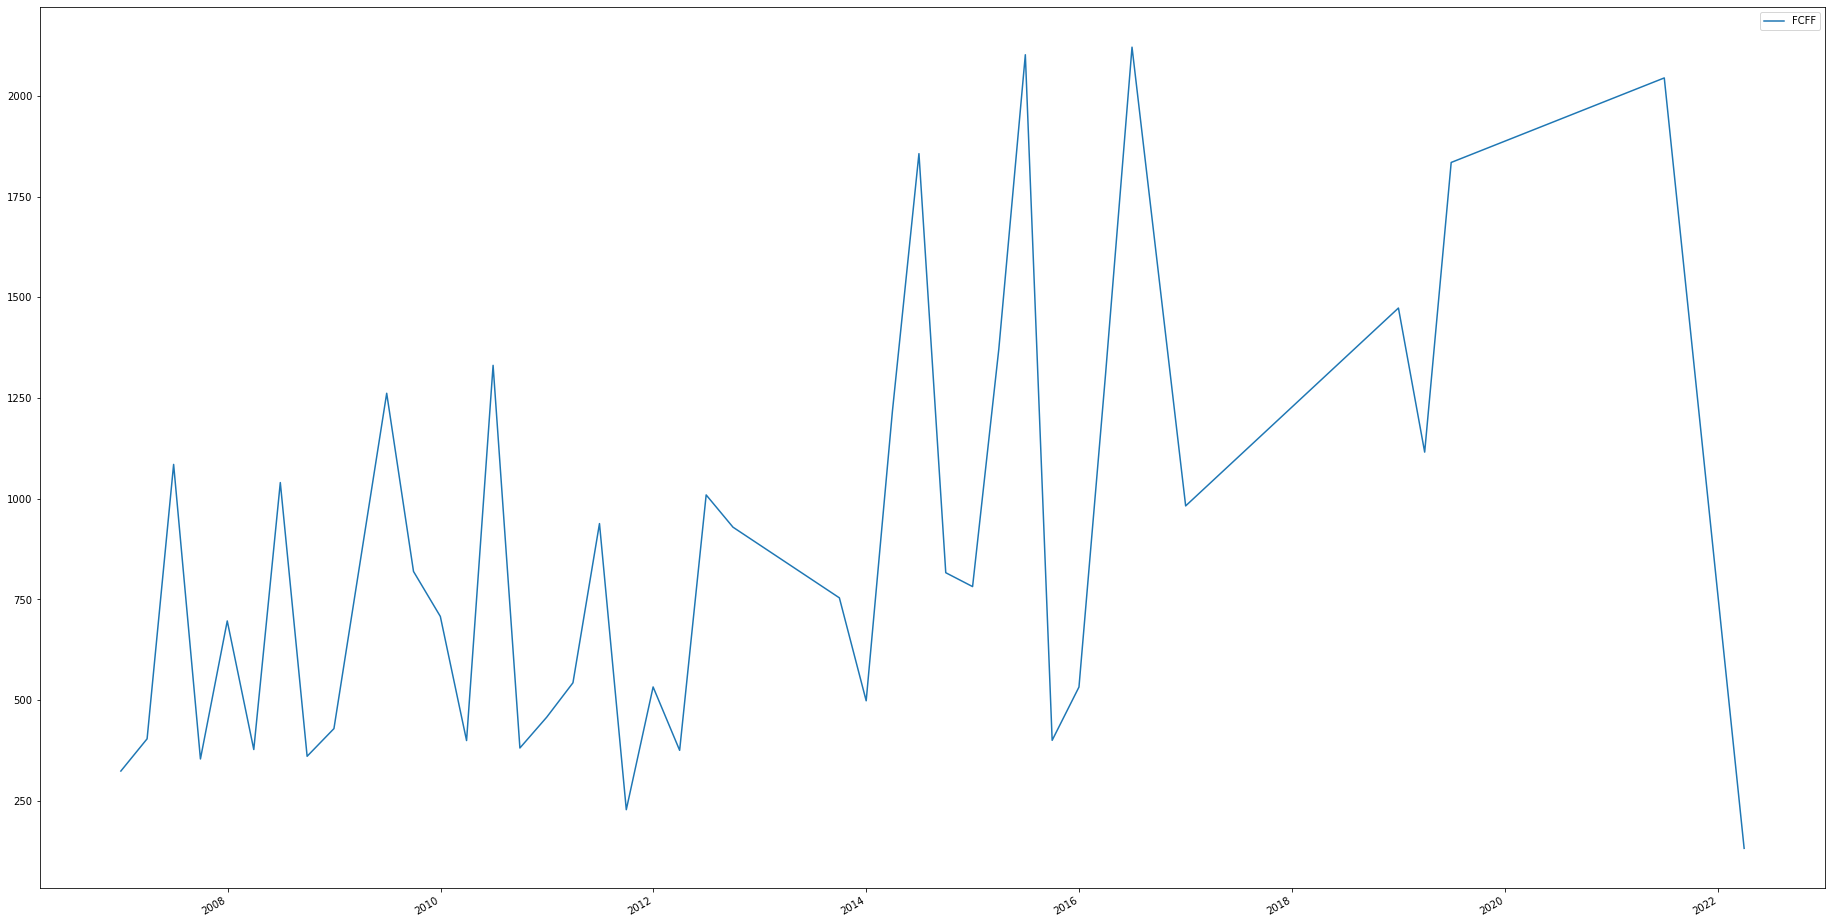

In [ ]:
frame['FCFF'].plot(legend=True, figsize=(29, 18))
plt.show()